In [16]:
#DISCLAIMER
#This data was provided by Codeacademy, it's a fictional company and data doesn't represent any private information or risk for anyone. 
#The dataset and code only has educative purposes and nothing related to lucrative intentions.

In [17]:
#This dataset represents a Startup company with some regular activities. 
#For this example I will use three datasets ("employees", "expenses", "financial_data") formatted in CSV files. I will attach the document in the Github.

In [18]:
#1 - Import modules. Every module that I will use I'm going to load it here. Many of them are statitics modules as Panda and Numpy but Matplotlib
#and Seaborn they have a lot of uses but right now i'm going to use only for graphics and plots.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
#2. Load the files and assign it a variable.
financial_data = pd.read_csv("financial_data.csv")
expenses = pd.read_csv("expenses.csv")
employees = pd.read_csv("employees.csv")

In [20]:
#3 At first we can review the "Financial_data" to see how it's structured and its columns type.
print(financial_data.head())
financial_data.dtypes
#Every record is a integer, it's not necessary change columns. Only has 7 rows, each one represent a month but came with a index number (1-6).

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000


Month       int64
Revenue     int64
Expenses    int64
dtype: object

In [21]:
#4 We need to pass the information of the "financial_data" dataframe in separated variables.
# We can do the graphs or analysis without this step but it can be more difficult write "df["column"]".
month_data = financial_data.Month
revenue_data = financial_data.Revenue
expenses_data = financial_data.Expenses

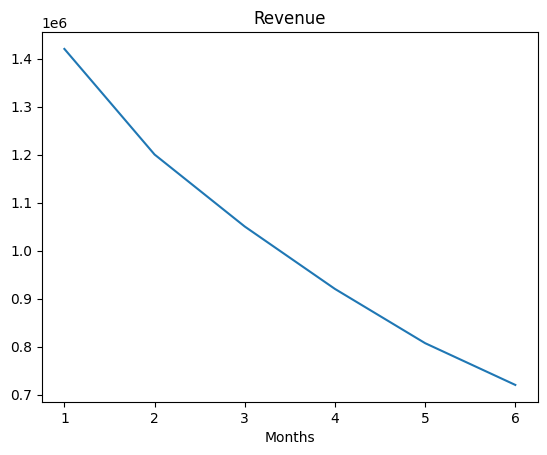

<Figure size 640x480 with 0 Axes>

In [24]:
#5 With the variables created, we can do the first graphic and put Month as X-axis and Revenue as Y-axis.
plt.plot(month, revenue_data)
plt.xlabel("Months")
plt.title("Revenue")
plt.show()
plt.clf()

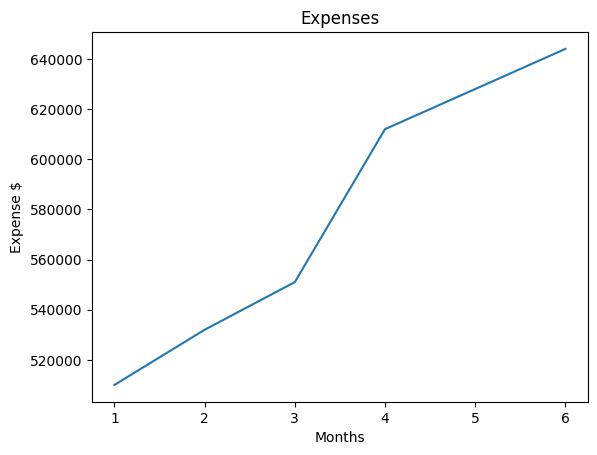

<Figure size 640x480 with 0 Axes>

In [25]:
#6 The same as previous step but replacing Revenue with Expenses.
plt.plot(month, expenses_data)
plt.xlabel("Months")
plt.ylabel("Expense $")
plt.title("Expenses")
plt.show()
plt.clf()


In [31]:
#7 Thanks to both graphics, we can see a firist pattern: The revenues are deceasing and the expenses are increasing month by month.
# Now the CEO wants to know why the expenses are growing up. We need inspect the dataframe "expenses.csv". 
print(expenses.head())




       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03


In [36]:
#8 As the same with the "financial data" dataframe, we pass the columns to variables.
expense_categories = expenses["Expense"]
proportions = expenses["Proportion"]
expense_names = ["Salaries", "Advertising", "Office Rent", "Other"]

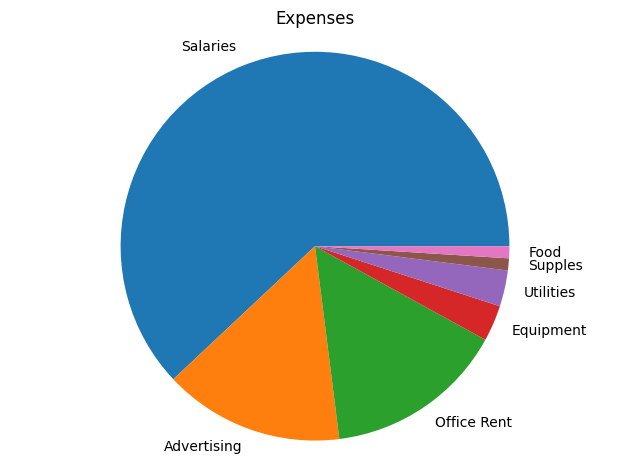

<function matplotlib.pyplot.clf()>

In [40]:
#9 The pie graph is very controverial but when exist proportions we can use it. Using the pass variables, we can created.
# The graph shows the salary like a most high expensive.

plt.pie(proportions, labels = expense_categories)
plt.title("Expenses")
plt.axis("Equal")
plt.tight_layout()
plt.show()
plt.clf

In [41]:
#9 knowing that SALARIES is the highest expense of the startup, the CEO wants to know about the employees. We can inspect first the file "employees".
print(employees.head())

                Name  Salary  Productivity  Commute Time
0     Mason Pender     87902         29.91         16.79
1          Mia Rew     95672         49.91         44.48
2   Jalisa Kroenke    177864         78.00         19.40
3  Krystal Homeyer    186643         24.36         42.06
4    Kiana Wishart    167148          4.08         25.58


In [43]:
#10 There is a column that show the employees' productivity score, we can sort the column to see ascending since the last and nexts.
sorted_productivity = employees.sort_values(by = ["Productivity"])
print(sorted_productivity)

                  Name  Salary  Productivity  Commute Time
259       Wilber Rye    111647          0.06         49.42
92    Fredric Gandee    154469          0.24         22.48
252  Johnson Fordham    168684          1.46         22.39
178    Lilia Lemoine    167579          1.67         27.36
162   Hilma Laughton     85506          1.79         36.41
..                 ...     ...           ...           ...
164      Miki Hartle     50856         99.54         31.39
88        Darell Nau     30530         99.63         44.25
23    Joaquina Neece     95562         99.66         48.65
202    Janae Officer    110139         99.69         15.45
6    Jacinta Dunford    130968         99.98         44.53

[300 rows x 4 columns]


In [44]:
#11 The business decided to cut the last 100 hundred employees with low productivity, we can save them in a variable to read it whenever we need.
employees_cut = sorted_productivity.head(100)
print(employees_cut)

                       Name  Salary  Productivity  Commute Time
259            Wilber Rye    111647          0.06         49.42
92         Fredric Gandee    154469          0.24         22.48
252       Johnson Fordham    168684          1.46         22.39
178         Lilia Lemoine    167579          1.67         27.36
162        Hilma Laughton     85506          1.79         36.41
..                      ...     ...           ...           ...
43   Bernardo Klingenberg     55464         34.52         32.27
186        Ashleigh Istre    178627         34.70         38.67
288       Penni Kimbrough    142680         35.21         49.64
269      Margot Mackenzie    114302         35.79         19.87
218        Quinn Frampton     44000         36.36         34.12

[100 rows x 4 columns]


In [51]:
#12 The CEO wants to know if its neccesary continues with the home office, the pandemic is over and wants to know the relation with the commute time.
# Begin with the variable creation and short description about its statitisc descriptive.

commute_time = employees["Commute Time"]
print(commute_time.describe())

#The average and median commute times are 33 and 31 minutes, respectively.

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


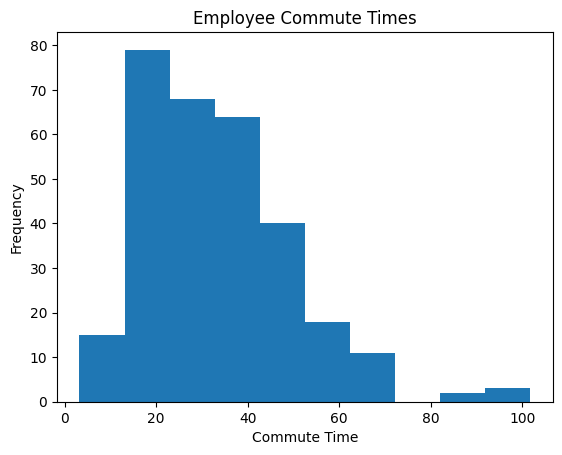

In [48]:
#13 We need to plotting this data and we are going to use the HISTOGRAM. We can see how are distributed the employees and their commute time.
plt.hist(commute_time)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()

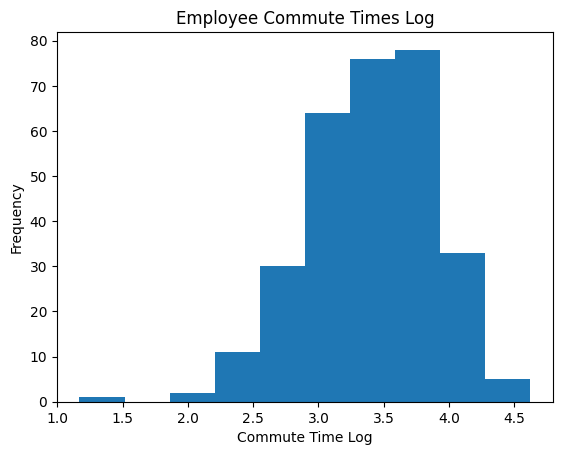

In [53]:
#14 The graphic has a right skewed tail (positive), we need to do more symmetrical or "normal" and for that reason we can use de the log transformation.
#We need to use numpy for the log transformation to the commute_time variable. We are creating a new one with the logarit results.
#After that we can plotting the new hist.

commute_time_log = np.log(commute_time)
plt.hist(commute_time_log)
plt.title("Employee Commute Times Log")
plt.xlabel("Commute Time Log")
plt.ylabel("Frequency")
plt.show()

# We can see now a "transformed" distribution and the quantity of employees who has big commute times.